## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from collections import Counter

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Loading data 

In [5]:
data = pd.read_csv("MNIST.csv")

In [6]:
data.shape

(42000, 785)

In [7]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [9]:
data = data.values

In [10]:
print(type(data))

<class 'numpy.ndarray'>


In [11]:
X = data[:,1:]
Y = data[:,0]

In [12]:
print(X.shape, Y.shape)

(42000, 784) (42000,)


## Splitting in Test & Train 

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state = 0, test_size = 0.2)

In [14]:
xtrain.shape

(33600, 784)

In [15]:
xtest.shape

(8400, 784)

In [16]:
xtrain

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
ytrain

array([6, 6, 4, ..., 9, 0, 9], dtype=int64)

In [24]:
x_test = xtest[:100][:]         ## Taking small size of testing

In [26]:
y_test = ytest[:100][:]         ## taking the correct output file

## Visualise data 

In [18]:
def draw_image(x):
    img = x.reshape((28,28))
    plt.imshow(img, cmap = "gray")
    plt.show()

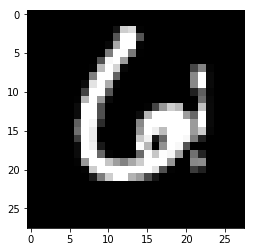

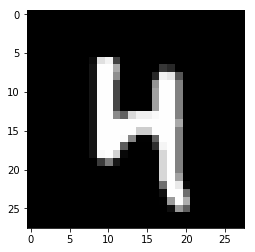

In [19]:
draw_image(xtrain[0])
draw_image(xtrain[2])

## Own implemented KNN 

In [20]:
## train
class KNN():
    
    ## Constructor
    def __init__(self, p = 2, k = 5):    ## default values
        
        self.p = p               ## p = 1 for manhattan distance
        self.k = k
    
    
    ## Train
    def train(self, xtrain, ytrain):
        
        self.xtrain = xtrain        ## initialising xtrain, ytrain
        self.ytrain = ytrain
    
    
    ##Predict
    def distance(self,train, test):
        
        return (sum((abs(test-train))**self.p)**(1/self.p))
    
    def predict_one(self, test):
        
        distances = []                ## store the distance and the index 
        
        m = len(self.xtrain)         ## length of xtrain
        
        for i in range(m):
            dist = self.distance(xtrain[i], test)
            distances.append([dist,i])
            
        distances = sorted(distances)
        
        classes = []                           ## Storing the k classes and finding the most frequent
        
        for i in range(self.k):
            classes.append(self.ytrain[distances[i][1]])
            
        target = Counter(classes).most_common(1)[0]
            
        return target[0]            ## returning the target class or most frequent
            
            
    def predict(self, xtest):
        
        predictions = []               ## storing predictions
        
        m = len(xtest)           ## length of xtest
        
        for i in range(m):
            predictions.append(self.predict_one(xtest[i]))         ## Calculating for each test one by one
            print(i+1,"->",predictions[i])
            
        return predictions

## Running and analysis Own Algorithm

In [21]:
clf1 = KNN()

In [22]:
clf1.train(xtrain,ytrain)       ##training

In [25]:
predictions1 = clf1.predict(x_test)       ##predictions

1 -> 3
2 -> 6
3 -> 9
4 -> 5
5 -> 6
6 -> 5
7 -> 6
8 -> 0
9 -> 0
10 -> 1
11 -> 7
12 -> 1
13 -> 5
14 -> 7
15 -> 8
16 -> 1
17 -> 1
18 -> 5
19 -> 9
20 -> 6
21 -> 9
22 -> 2
23 -> 2
24 -> 8
25 -> 4
26 -> 6
27 -> 2
28 -> 5
29 -> 4
30 -> 4
31 -> 8
32 -> 2
33 -> 8
34 -> 9
35 -> 3
36 -> 8
37 -> 9
38 -> 5
39 -> 2
40 -> 7
41 -> 6
42 -> 3
43 -> 1
44 -> 7
45 -> 9
46 -> 7
47 -> 4
48 -> 2
49 -> 5
50 -> 0
51 -> 0
52 -> 3
53 -> 9
54 -> 8
55 -> 5
56 -> 1
57 -> 3
58 -> 1
59 -> 3
60 -> 5
61 -> 4
62 -> 6
63 -> 4
64 -> 7
65 -> 8
66 -> 2
67 -> 4
68 -> 8
69 -> 1
70 -> 2
71 -> 0
72 -> 0
73 -> 6
74 -> 5
75 -> 7
76 -> 0
77 -> 9
78 -> 1
79 -> 9
80 -> 2
81 -> 0
82 -> 4
83 -> 3
84 -> 3
85 -> 2
86 -> 8
87 -> 7
88 -> 6
89 -> 5
90 -> 8
91 -> 7
92 -> 9
93 -> 2
94 -> 8
95 -> 8
96 -> 4
97 -> 9
98 -> 1
99 -> 5
100 -> 1


In [27]:
confusion_matrix(y_test, predictions1)

array([[ 8,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 11,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  8,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  9,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 12,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  9,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  9,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 10]], dtype=int64)

In [28]:
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      0.92      0.96        12
           3       1.00      1.00      1.00         8
           4       1.00      0.90      0.95        10
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         9
           8       0.92      1.00      0.96        11
           9       0.91      1.00      0.95        10

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



## Running and analysis Inbuilt KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
clf2 = KNeighborsClassifier()

In [33]:
clf2.fit(xtrain,ytrain)           ## training

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
predictions2 = clf2.predict(x_test)              ##predicting
predictions2

array([3, 6, 9, 5, 6, 5, 6, 0, 0, 1, 7, 1, 5, 7, 8, 1, 1, 5, 9, 6, 9, 2,
       2, 8, 4, 6, 2, 5, 4, 4, 8, 2, 8, 9, 3, 8, 9, 5, 2, 7, 6, 3, 1, 7,
       9, 7, 4, 2, 5, 0, 0, 3, 3, 8, 5, 1, 3, 1, 3, 5, 4, 6, 4, 7, 8, 2,
       4, 8, 1, 2, 0, 0, 6, 5, 7, 0, 9, 1, 9, 2, 0, 4, 3, 3, 2, 8, 7, 6,
       5, 8, 7, 9, 2, 8, 8, 4, 9, 1, 5, 1], dtype=int64)

In [36]:
confusion_matrix(y_test, predictions2)

array([[ 8,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 11,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  8,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  9,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 12,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  9,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  9,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  9]], dtype=int64)

In [37]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      0.92      0.96        12
           3       0.89      1.00      0.94         8
           4       1.00      0.90      0.95        10
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         9
           8       0.92      1.00      0.96        11
           9       0.90      0.90      0.90        10

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



# The END